In [ ]:
from google.colab import drive;
drive.mount("/content/gdrive");

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ls

## python libraries

In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

## load dataset

In [ ]:

df = pd.read_csv("text_emotions.csv");
print(df.head(5));

## sentiment count plot

In [ ]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df[col].dropna().value_counts());
print((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts()))));
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:6]
print(explode);
labels = ['joy','sadness','anger','fear','love','surprise'];
print(labels);
sizes = df[col].value_counts()[:6]
print(sizes)
#ax1.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

## replace sentiments

In [ ]:
df["sentiment"].replace({"love": "happiness","fun":"happiness","enthusiasm":"happiness","relief":"neutral","empty":"sadness","boredom":"sadness","hate":"anger"}, inplace=True)

## replaced sentiments count plot

In [ ]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df[col].dropna().value_counts());
print((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts()))));
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['happiness','neutral','worry','sadness','surprise','anger'];
print(labels);
sizes = df[col].value_counts()
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

## character and number of words in each content

In [ ]:
df['char_length'] = df['content'].apply(lambda x : len(x))
df['token_length'] = df['content'].apply(lambda x : len(x.split(" ")))
print(df);


## number of characters and token plot

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(df['char_length'], ax=ax1)
sns.histplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

## Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.


In [ ]:
!pip install inflect

## expanding english words


In [ ]:
!pip install contractions

## scraping after a long time 

In [ ]:
!pip install bs4

##  Data preparation and text-preprocessing libraries


In [ ]:

from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
import nltk;
import inflect;
import contractions;
from bs4 import BeautifulSoup;
import re, string, unicodedata;
from nltk import word_tokenize, sent_tokenize;
from nltk.corpus import stopwords;
from nltk.stem import LancasterStemmer, WordNetLemmatizer;
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

## text preprocessing

In [ ]:


def text_preprocessing_platform(df, text_col, remove_stopwords=True):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser");
        text = soup.get_text();
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text);
        return text;
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore');
            new_words.append(new_word);
        return new_words;
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = word.lower();
            new_words.append(new_word);
        return new_words;
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word);
            if new_word != '':
                new_words.append(new_word);
        return new_words;
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine();
        new_words = [];
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word);
                new_words.append(new_word);
            else:
                new_words.append(word);
        return new_words;
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = [];
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word);
        return new_words;
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer();
        stems = [];
        for word in words:
            stem = stemmer.stem(word);
            stems.append(stem);
        return stems;
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer();
        lemmas = [];
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v');
            lemmas.append(lemma);
        return lemmas;
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words);
        words = to_lowercase(words);
        words = remove_punctuation(words);
        words = replace_numbers(words);
        if remove_stopwords:
            words = remove_stopwords(words);
        words = stem_words(words)
        # words = lemmatize_verbs(words);
        return words;
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text);
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text);
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)]);
        return text;
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]];
    
    
    # return processed df
    return df;

## before and after text preprocessings

Before Text Preprocessing


,content
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


(18000, 4)
                                               content  ... token_length
340  i am beginning to feel that theres a good chan...  ...           13

[1 rows x 4 columns]


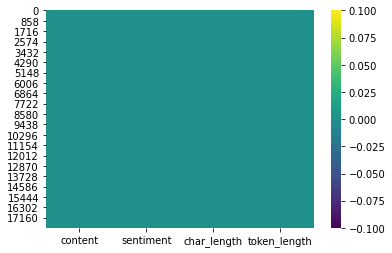

After Text Preprocessing


,content
0,feel humy
1,go feel hopeless damn hop around someon car awak
2,grab minut post feel greedy wrong
3,ev feel nostalg fireplac know stil property
4,feel grouchy


(18000, 4)
                              content sentiment  char_length  token_length
340  begin feel good chant might pass       joy           61            13


In [ ]:
print("Before Text Preprocessing")
display(df.head()[['content']])
print(df.shape);
print(df.loc[[340]])
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()
processed_df = text_preprocessing_platform(df, 'content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['content']])
print(processed_df.shape);
print(processed_df.loc[[340]]);

processed_df.to_csv('After_cleaning.csv');

## model and evaluation metrices libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import classification_report;
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve;

## variable declaration

In [ ]:
target = 'sentiment'

## Tf-Idf of tweet content

In [ ]:
tf = TfidfVectorizer();
print(tf.fit_transform(processed_df['content'])[0])
text_tf= tf.fit_transform(processed_df['content']);
# feature extract
feature_names = tf.get_feature_names()
print(feature_names);
doc = 0
# for first doc
feature_index =text_tf[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [text_tf[doc, x] for x in feature_index])
print(tfidf_scores);
# tfidf score for first doc with featue , tfidf value
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print (w, s);

  (0, 3790)	0.9887708368941819
  (0, 2831)	0.14943972734041913
['aa', 'aaaaaaand', 'aaaaand', 'aaaah', 'aaaand', 'aac', 'aahhh', 'aaron', 'ab', 'abandon', 'abb', 'abbigail', 'abc', 'abdom', 'abdomin', 'abduc', 'abelard', 'abhor', 'abid', 'abit', 'abl', 'ablo', 'abnorm', 'aboard', 'abomin', 'abort', 'abou', 'abound', 'abraham', 'abroad', 'abrupt', 'abs', 'absolout', 'absolv', 'absorb', 'abstain', 'abstin', 'abstract', 'absurd', 'abt', 'abud', 'abund', 'abus', 'abyss', 'ac', 'academ', 'academy', 'acaus', 'acc', 'acceiv', 'accel', 'accentu', 'access', 'accid', 'acclim', 'acco', 'accommod', 'accompany', 'accompl', 'accord', 'account', 'accru', 'acct', 'accum', 'accus', 'accustom', 'ach', 'acheiv', 'achiev', 'achy', 'acim', 'ack', 'acknowledg', 'acn', 'aconfid', 'acquaint', 'acquir', 'acronym', 'across', 'act', 'actau', 'actress', 'acu', 'acum', 'acut', 'ad', 'adam', 'adapt', 'addict', 'addison', 'addit', 'addl', 'address', 'adequ', 'adf', 'adh', 'adject', 'adjust', 'admin', 'admir', 'admit

## final dataset after modification

In [ ]:
train_final = processed_df[['content', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,content,sentiment
0,feel humy,sadness
1,go feel hopeless damn hop around someon car awak,sadness
2,grab minut post feel greedy wrong,anger


## implementing X and Y from dataset

In [ ]:
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])
df = train_final
x=text_tf;
y =df[target]
print(x);
print(y);

  (0, 3790)	0.9887708368941819
  (0, 2831)	0.14943972734041913
  (1, 523)	0.46178992909906097
  (1, 1144)	0.3082302136904785
  (1, 7372)	0.31010387986299726
  (1, 401)	0.29894036291948733
  (1, 3727)	0.3078216376112891
  (1, 1863)	0.4174527497611846
  (1, 3728)	0.39055737317846706
  (1, 3290)	0.28448214069666655
  (1, 2831)	0.06106005959868465
  (2, 9052)	0.40289757740348864
  (2, 3369)	0.4465981335395167
  (2, 6121)	0.37675016104830594
  (2, 5073)	0.4524839559131989
  (2, 3331)	0.535449905992907
  (2, 2831)	0.06953152669706454
  (3, 6260)	0.5620279136779821
  (3, 7591)	0.2640243957860789
  (3, 4420)	0.23783507852640226
  (3, 2896)	0.5756764488135656
  (3, 5487)	0.40609155886652415
  (3, 2651)	0.24019983200164655
  (3, 2831)	0.061972017104901564
  (4, 3397)	0.9908320540165291
  :	:
  (17996, 5361)	0.4553167388182938
  (17996, 2234)	0.4897336508169255
  (17996, 1729)	0.42471965653754995
  (17996, 4670)	0.2647756462670154
  (17996, 2831)	0.0651165776551642
  (17997, 68)	0.582867957451841

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## model libraries

In [ ]:
import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torchvision as tv
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import socket
import getpass

import time
import codecs
import json
import re
from collections import defaultdict
from nltk.stem.porter import *
import string
from nltk.tokenize import word_tokenize
import shutil

import torch.nn as nn
from torch.autograd import Variable

import torch.utils.data as data
from sklearn.preprocessing import LabelEncoder

## oversampling Adasyn

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

## Adasyn implementation to increase minority class data

In [ ]:
adasyn_over_sample = ADASYN(random_state=11, n_neighbors=5,sampling_strategy='minority')

print(f"Initial set observations {x.shape[0]}")
print(f"Initial set target classes {len(set(y))}")
x_ada, y_ada = adasyn_over_sample.fit_resample(x, y)
print(f"Modified set observations {x_ada.shape[0]}")
print(f"Modified set target classes {len(set(y_ada))}")

Initial set observations 18000
Initial set target classes 6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Modified set observations 23472
Modified set target classes 6


## normalize oversampled X data

In [ ]:
from sklearn.preprocessing import normalize
x_ada_norm = normalize(x_ada);
print(x_ada_norm);


  (0, 3790)	0.9887708368941821
  (0, 2831)	0.14943972734041916
  (1, 523)	0.46178992909906097
  (1, 1144)	0.3082302136904785
  (1, 7372)	0.31010387986299726
  (1, 401)	0.29894036291948733
  (1, 3727)	0.3078216376112891
  (1, 1863)	0.4174527497611846
  (1, 3728)	0.39055737317846706
  (1, 3290)	0.28448214069666655
  (1, 2831)	0.06106005959868465
  (2, 9052)	0.4028975774034887
  (2, 3369)	0.4465981335395168
  (2, 6121)	0.376750161048306
  (2, 5073)	0.45248395591319895
  (2, 3331)	0.5354499059929071
  (2, 2831)	0.06953152669706456
  (3, 6260)	0.5620279136779821
  (3, 7591)	0.2640243957860789
  (3, 4420)	0.23783507852640226
  (3, 2896)	0.5756764488135656
  (3, 5487)	0.40609155886652415
  (3, 2651)	0.24019983200164655
  (3, 2831)	0.061972017104901564
  (4, 3397)	0.9908320540165291
  :	:
  (23469, 2762)	0.10865117256016237
  (23469, 2831)	0.07882376596881664
  (23469, 5855)	0.5584669596469242
  (23469, 7591)	0.256131550788904
  (23469, 7630)	0.4462119159166195
  (23469, 7899)	0.45731345454846

##  Attention Model

In [ ]:
class AttentionNet(nn.Module):
    def __init__(self, num_classes, batch_size, input_features, output_features):
        
        super(AttentionNet,self).__init__()
        self.input_features = input_features
        self.output_features = output_features #k 
        self.num_classes = num_classes
        self.batch_size = batch_size
        
        self.image1 = nn.Linear(input_features, output_features, bias=False)
        self.question1 = nn.Linear(input_features, output_features)
        self.attention1 = nn.Linear(output_features, 1)
        
        self.image2 = nn.Linear(input_features, output_features, bias=False)
        self.question2 = nn.Linear(input_features, output_features)
        self.attention2 = nn.Linear(output_features, 1)
        
        self.answer_dist = nn.Linear(input_features, self.num_classes)
                
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, image, question):
    
        irep_1 = self.image1(image)
        qrep_1 = self.question1(question).unsqueeze(dim=1)
        ha_1 = self.tanh(irep_1 + qrep_1)
        ha_1 = self.dropout(ha_1)
        pi_1 = self.softmax(self.attention1(ha_1))
        u_1 = (pi_1 * image).sum(dim=1) + question
        
        irep_2 = self.image2(image)
        qrep_2 = self.question2(u_1).unsqueeze(dim=1)
        ha_2 = self.tanh(irep_2 + qrep_2)
        ha_2 = self.dropout(ha_2)
        pi_2 = self.softmax(self.attention2(ha_2))
        u_2 = (pi_2 * image).sum(dim=1) + u_1
      
        h=self.dropout(u_2);

        w_u = self.answer_dist(h)

        return w_u

## train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ada_norm,y_ada, test_size=0.3, random_state=42);

## RandomForestClassifier model 

In [ ]:
dt = RandomForestClassifier(random_state=42, verbose=2, class_weight='balanced_subsample',n_estimators=100,criterion='gini')
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)


building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


## accuracy RF

In [ ]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",score)

Score: 85.66


## confusion matrix RF

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
cnf_matrix = confusion_matrix(y_test,preddt);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[ 583   34    7   49   51    4]
 [  26  478    4   32   35   61]
 [   5    2  289  138   10    4]
 [  32   22   78 1514   61   38]
 [  76   44   28  144 1349   19]
 [   0    6    0    0    0 1819]]


## plot confusion matrix RF

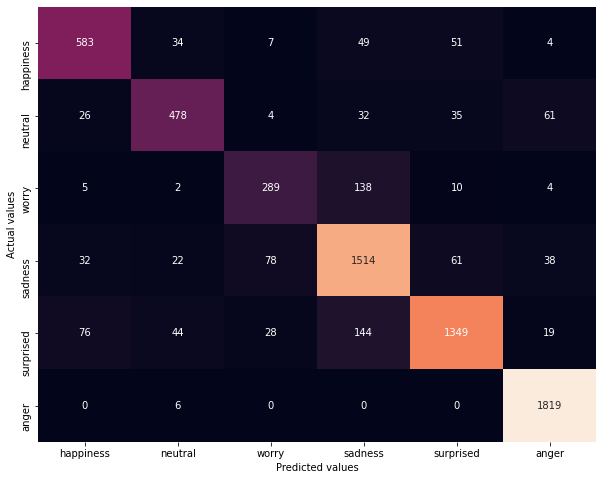

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation metrices RF

In [ ]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       728
           1       0.82      0.75      0.78       636
           2       0.71      0.65      0.68       448
           3       0.81      0.87      0.84      1745
           4       0.90      0.81      0.85      1660
           5       0.94      1.00      0.96      1825

    accuracy                           0.86      7042
   macro avg       0.83      0.81      0.82      7042
weighted avg       0.86      0.86      0.85      7042



## SVM

In [ ]:
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

## accuracy SVM

In [ ]:
score = round(accuracy_score(y_test,y_pred)*100,2)
print("Score:",score)

Score: 86.75


## confusion matrix SVM

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[ 535   26    5   84   75    3]
 [  18  450    2   73   53   40]
 [   2    6  247  167   25    1]
 [  18   11   40 1604   53   19]
 [  56   27   16  105 1450    6]
 [   1    1    0    0    0 1823]]


## plot confusion matrix SVM

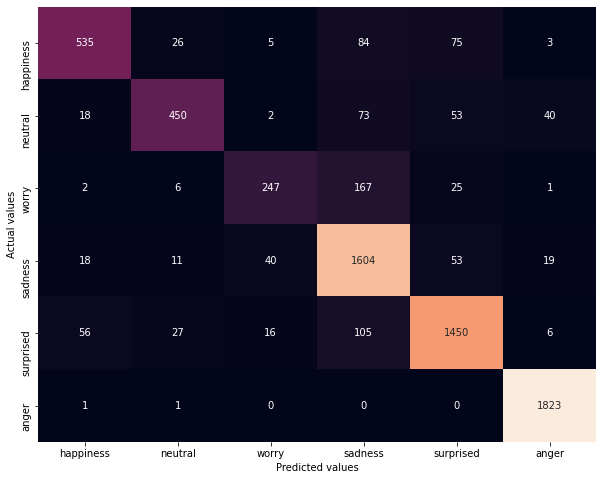

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation metrices SVM

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       728
           1       0.86      0.71      0.78       636
           2       0.80      0.55      0.65       448
           3       0.79      0.92      0.85      1745
           4       0.88      0.87      0.87      1660
           5       0.96      1.00      0.98      1825

    accuracy                           0.87      7042
   macro avg       0.86      0.80      0.82      7042
weighted avg       0.87      0.87      0.86      7042



## XGBC eXtreme Gradient Boosting (reduce overfitting)

In [ ]:
xgbc = XGBClassifier(max_depth=16, n_estimators=1000,nthread = 6)
xgbc.fit(x_train,y_train)
prediction_xgb = xgbc.predict(x_test)

accuracy XGBoost

In [ ]:
score = round(accuracy_score(y_test,prediction_xgb)*100,2)
print("Score:",score)

## consfusion matrix XGBoost

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,prediction_xgb))
cnf_matrix = confusion_matrix(y_test,prediction_xgb);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

## plot confusion matrix XGBoost

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation metrics XGBoost


In [ ]:
print("Classification Report:")
print(classification_report(y_test,prediction_xgb))

## logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_test)*100,2)
print("Score:",score)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_test))
cnf_matrix = confusion_matrix(y_test,y_pred_test);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

## sgd classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(verbose = 2, random_state = 42)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred_sgd = model.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_sgd)*100,2)
print("Score:",score)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_sgd))
cnf_matrix = confusion_matrix(y_test,y_pred_sgd);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_sgd))

## Naive Bayes(Bernouli and multinomial)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
MNB = MultinomialNB()
BNB = BernoulliNB()

In [ ]:
BNB.fit(x_train, y_train)
y2_BNB_model = BNB.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_BNB_model)*100,2)
print("Score:",score)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_BNB_model))
cnf_matrix = confusion_matrix(y_test,y2_BNB_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_BNB_model))

## Linear and Non linear SVC

In [ ]:
from sklearn.svm import LinearSVC, NuSVC


In [ ]:

LSVC = LinearSVC()
NSVC = NuSVC(kernel='rbf',nu=0.01,verbose = 2)


In [ ]:
LSVC.fit(x_train,y_train)
y2_LSVC_model = LSVC.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_LSVC_model)*100,2)
print("Score:",score)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_LSVC_model))
cnf_matrix = confusion_matrix(y_test,y2_LSVC_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_LSVC_model))

In [ ]:
NSVC.fit(x_train,y_train)
y2_NSVC_model = NSVC.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_NSVC_model)*100,2)
print("Score:",score)

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_NSVC_model))
cnf_matrix = confusion_matrix(y_test,y2_NSVC_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_NSVC_model))

## end of dataset 1  highest accuracy svm and non linear svm

